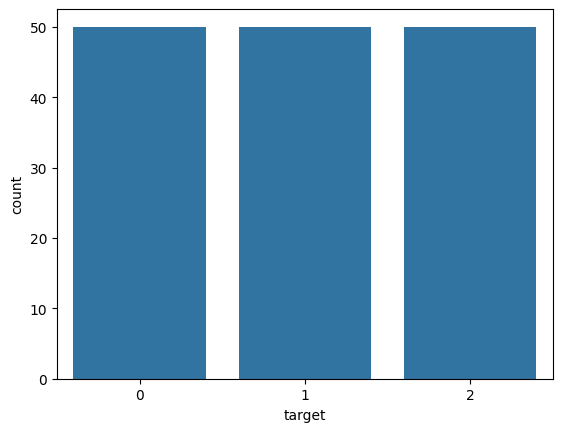

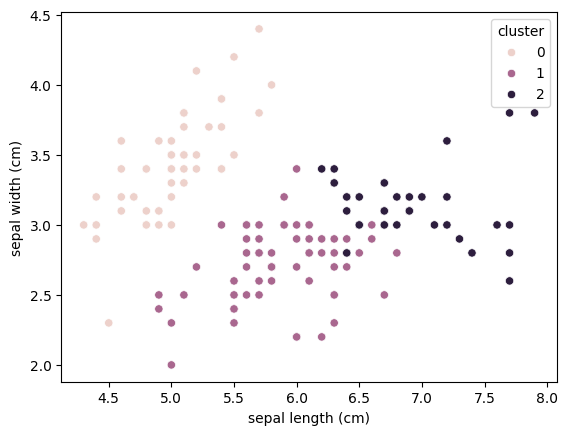

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix

#завантажуємо дані iris
iris = load_iris()

#створюємо dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#додаємо реальні класи
df["target"] = iris.target

#дивимось базову статистику
df.describe()

#будуємо графік кількості кожного класу
sns.countplot(x="target", data=df)
plt.show()

#відділяємо ознаки від класу
X = df.drop("target", axis=1)

#стандартизуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#створюємо модель спектральної кластеризації
model = SpectralClustering(n_clusters=3, random_state=1)

#отримуємо кластери
clusters = model.fit_predict(X_scaled)

#додаємо кластери до таблиці
df["cluster"] = clusters

#порівнюємо реальні класи і кластери
confusion_matrix(df["target"], df["cluster"])

#будуємо графік кластерів
sns.scatterplot(x=df.iloc[:,0],
                y=df.iloc[:,1],
                hue=df["cluster"])
plt.show()


#У цій роботі ми завантажили дані Iris, проаналізували їх і виконали спектральну кластеризацію. Алгоритм поділив об’єкти на 3 групи, далі повівняли з реальними класами в результаті в основному усе співпадає. Отже, метод працює добре.